In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
file_path = 'US Airline Flight Routes and Fares 1993-2024.csv'  # Replace with the correct file path
df = pd.read_csv(file_path, low_memory=False)

# Grouping and summing the passengers
passenger_data = df.groupby(['city2', 'Year'])['passengers'].sum().reset_index()

# Filtering the data for the years 1993 to 2019
passenger_data_filtered = passenger_data[(passenger_data['Year'] >= 2000) & (passenger_data['Year'] <= 2019)]

# Calculating the variation for each city between 1993 and 2019
variation = passenger_data_filtered[passenger_data_filtered['Year'] == 2019].set_index('city2')['passengers'] - \
            passenger_data_filtered[passenger_data_filtered['Year'] == 2000].set_index('city2')['passengers']

# Resetting the index and renaming columns
variation = variation.reset_index()

    
variation = variation.rename(columns={'passengers': 'Passenger_Variation'})

# Verify that the column exists
print(variation.columns)

# Merge the variation data with the original dataframe on 'city2'
df_with_variation = pd.merge(passenger_data, variation[['city2', 'Passenger_Variation']], on='city2', how='left')




Index(['city2', 'Passenger_Variation'], dtype='object')


In [2]:
# Grouping and summing the passengers for 2019
top_cities_2019 = df[df['Year'] == 2019].groupby('city2')['passengers'].sum().reset_index()

# Sort the cities by passengers in descending order and select the top 8
top_8_cities = top_cities_2019.sort_values(by='passengers', ascending=False).head(8)

In [3]:
# select only the top 8 cities
df_top_8_cities = df_with_variation[df_with_variation['city2'].isin(top_8_cities['city2'])]

In [4]:
df_top_8_cities_2019=df_top_8_cities[df_top_8_cities['Year'] == 2019]
# select just the three columns 
df_top_8_summary = df_top_8_cities_2019[['city2', 'passengers', 'Passenger_Variation']]

In [5]:
#sort the values
df_top_8_summary = df_top_8_summary.sort_values(by='passengers', ascending=False).reset_index(drop=True)
#change columns names
df_top_8_summary.columns=['City of Destination','Passengers in 2019','Variation from 2000 to 2019']
#make coloumn integer
df_top_8_summary['Variation from 2000 to 2019']=df_top_8_summary['Variation from 2000 to 2019'].astype(int)



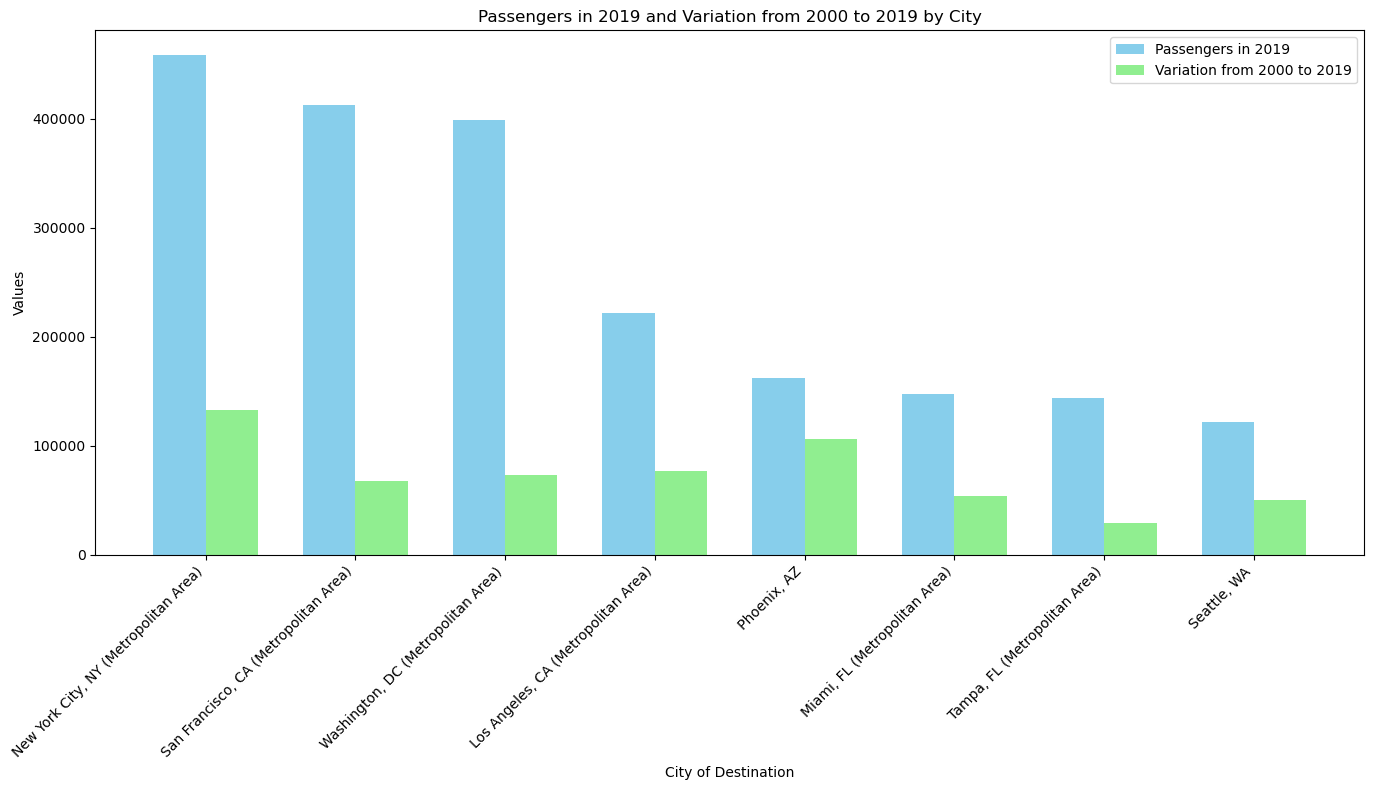

In [6]:

# Set the positions and width for the bars
x = np.arange(len(df_top_8_summary['City of Destination']))  # the label locations
width = 0.35  # the width of the bars

# Plotting the grouped bar chart
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the first set of bars (Passengers in 2019)
bars1 = ax.bar(x - width/2, df_top_8_summary['Passengers in 2019'], width, label='Passengers in 2019', color='skyblue')

# Plot the second set of bars (Variation from 2000 to 2019)
bars2 = ax.bar(x + width/2, df_top_8_summary['Variation from 2000 to 2019'], width, label='Variation from 2000 to 2019', color='lightgreen')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_xlabel('City of Destination')
ax.set_ylabel('Values')
ax.set_title('Passengers in 2019 and Variation from 2000 to 2019 by City')
ax.set_xticks(x)
ax.set_xticklabels(df_top_8_summary['City of Destination'], rotation=45, ha='right')
ax.legend()

# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()